### TODO:
- [x] show percentage instead of merely showing absolute number
- [ ] add another column to indicate decade
- [ ] add more parameters to the plotting function
- [x] change the format of y axis from float to percentage
- [ ] come up with a better way to do visualization for secondary axis

In [1]:
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

# pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_columns', 10)

%autosave 20
%matplotlib inline  

Autosaving every 20 seconds


## Load Title File

In [2]:
!ls ../data

films-2020-07-01.json


In [3]:
data_path = '../data/films-2020-07-01.json'

In [4]:
# df = pd.read_json ('../data/films-2020-07-01.json')
# print(df.shape)

In [5]:
# %time
# import json
# import pandas as pd
# with open('../data/films-2020-07-01.json') as json_data:
#    # https://stackoverflow.com/a/21266043/5861873
#    data = json.load(json_data)
#    df = pd.json_normalize(data)
    
# print(df.shape)

In [6]:
# df.head()

In [7]:
%time
import json
import pandas as pd
with open(data_path) as json_data:
   # https://stackoverflow.com/a/41289913/5861873
   data = json.load(json_data)
   df = pd.DataFrame({'item': [x['item']['value'] for x in data], \
                      'title': [x['title']['value'] for x in data], \
                      'published': [x['published']['value'] for x in data]})

print(df.shape)

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 20 µs
(63807, 3)


In [8]:
df.shape

(63807, 3)

In [9]:
df.head()

,item,title,published
0,http://www.wikidata.org/entity/Q4069062,The Arrest of a Pickpocket,1895-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q7168279,"Performing Animals; or, Skipping Dogs",1895-01-01T00:00:00Z
2,http://www.wikidata.org/entity/Q2819823,A Morning Alarm,1896-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q3326074,Mounted Police Charge,1896-01-01T00:00:00Z
4,http://www.wikidata.org/entity/Q3520164,The Burning Stable,1896-01-01T00:00:00Z


## Sanity Check

### null value

In [10]:
df.isnull().sum()

item         0
title        0
published    0
dtype: int64

### duplicates

In [11]:
# there are duplicate items and titles
print(df.shape[0])
print('\n')
print(df.nunique())

63807


item         63754
title        58083
published     7216
dtype: int64


In [12]:
df.groupby(['item'])['title'].count().sort_values(ascending=False).reset_index()

,item,title
0,http://www.wikidata.org/entity/Q6748375,3
1,http://www.wikidata.org/entity/Q20439354,3
2,http://www.wikidata.org/entity/Q501105,2
3,http://www.wikidata.org/entity/Q9358159,2
4,http://www.wikidata.org/entity/Q19365765,2
...,...,...
63749,http://www.wikidata.org/entity/Q54868306,1
63750,http://www.wikidata.org/entity/Q54868305,1
63751,http://www.wikidata.org/entity/Q54868300,1
63752,http://www.wikidata.org/entity/Q54868299,1


#### same film can have different names (a.k.a)

In [13]:
df[df.item=='http://www.wikidata.org/entity/Q6748375']

,item,title,published
25415,http://www.wikidata.org/entity/Q6748375,Island of the Doomed,1967-01-01T00:00:00Z
25416,http://www.wikidata.org/entity/Q6748375,Maneater of Hydra,1967-01-01T00:00:00Z
25417,http://www.wikidata.org/entity/Q6748375,The Blood Suckers,1967-01-01T00:00:00Z


In [14]:
df[df.item=='http://www.wikidata.org/entity/Q20439354']

,item,title,published
26193,http://www.wikidata.org/entity/Q20439354,Cry Chicago,1969-09-22T00:00:00Z
26194,http://www.wikidata.org/entity/Q20439354,The Mafia Mob,1969-09-22T00:00:00Z
26195,http://www.wikidata.org/entity/Q20439354,The True Story of Frank Mannata,1969-09-22T00:00:00Z


In [15]:
item_count = df.groupby(['item'])['title'].count().sort_values(ascending=False).reset_index()

In [16]:
print('{} film have duplicate titles'.format(item_count[item_count.title>1].shape[0]))

51 film have duplicate titles


In [17]:
# set all title values as lower cases
df['title'] = df['title'].str.lower()

In [18]:
df.head()

,item,title,published
0,http://www.wikidata.org/entity/Q4069062,the arrest of a pickpocket,1895-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q7168279,"performing animals; or, skipping dogs",1895-01-01T00:00:00Z
2,http://www.wikidata.org/entity/Q2819823,a morning alarm,1896-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q3326074,mounted police charge,1896-01-01T00:00:00Z
4,http://www.wikidata.org/entity/Q3520164,the burning stable,1896-01-01T00:00:00Z


In [19]:
df.groupby(['title'])['item'].count().sort_values(ascending=False).reset_index()

,title,item
0,the outsider,10
1,treasure island,10
2,the three musketeers,10
3,life,9
4,exposed,8
...,...,...
58035,splatter university,1
58036,splatter farm,1
58037,splatter beach,1
58038,splash,1


#### different films can have the same name

In [20]:
df[df.title=='the outsider'].sort_values(by=['published'])

,item,title,published
1698,http://www.wikidata.org/entity/Q56279378,the outsider,1917-01-01T00:00:00Z
5754,http://www.wikidata.org/entity/Q7755697,the outsider,1926-01-01T00:00:00Z
8397,http://www.wikidata.org/entity/Q7755698,the outsider,1931-01-01T00:00:00Z
13609,http://www.wikidata.org/entity/Q7755699,the outsider,1939-01-01T00:00:00Z
23674,http://www.wikidata.org/entity/Q7755700,the outsider,1961-01-01T00:00:00Z
29954,http://www.wikidata.org/entity/Q16931670,the outsider,1980-01-01T00:00:00Z
45040,http://www.wikidata.org/entity/Q56274148,the outsider,2005-01-01T00:00:00Z
57121,http://www.wikidata.org/entity/Q14948583,the outsider,2014-02-07T00:00:00Z
59335,http://www.wikidata.org/entity/Q25111228,the outsider,2016-01-01T00:00:00Z
62403,http://www.wikidata.org/entity/Q23767815,the outsider,2018-03-09T00:00:00Z


In [21]:
df[df.title=='little women'].sort_values(by=['published'])

,item,title,published
1780,http://www.wikidata.org/entity/Q6652563,little women,1917-09-17T00:00:00Z
9877,http://www.wikidata.org/entity/Q195274,little women,1933-11-16T00:00:00Z
18657,http://www.wikidata.org/entity/Q1466426,little women,1949-03-10T00:00:00Z
36722,http://www.wikidata.org/entity/Q850522,little women,1994-12-21T00:00:00Z
62656,http://www.wikidata.org/entity/Q56241200,little women,2018-09-28T00:00:00Z
63560,http://www.wikidata.org/entity/Q56881140,little women,2019-12-25T00:00:00Z


In [22]:
df[df.title=='love'].sort_values(by=['published'])

,item,title,published
2909,http://www.wikidata.org/entity/Q6690230,love,1920-01-01T00:00:00Z
6065,http://www.wikidata.org/entity/Q561162,love,1927-01-01T00:00:00Z
34883,http://www.wikidata.org/entity/Q4271757,love,1991-01-01T00:00:00Z
44746,http://www.wikidata.org/entity/Q6690233,love,2005-01-01T00:00:00Z
52087,http://www.wikidata.org/entity/Q1872389,love,2011-01-01T00:00:00Z
58879,http://www.wikidata.org/entity/Q19829024,love,2015-09-24T00:00:00Z


In [23]:
title_count = df.groupby(['title'])['item'].count().sort_values(ascending=False).reset_index()

In [24]:
title_count[title_count.item==6]

,title,item
18,asylum,6
19,camille,6
20,rage,6
21,king lear,6
22,great expectations,6
23,body and soul,6
24,midnight,6
25,the awakening,6
26,little women,6
27,brothers,6


In [25]:
print('{} film titles have been used more than once'.format(title_count[title_count.item>1].shape[0]))

4226 film titles have been used more than once


## Data Cleaning

### generate more date columns

In [26]:
df["date"] = df['published'].apply(lambda x: x[0:10])
df["year"] = df['published'].apply(lambda x: x[0:4])
df["month"] = df['published'].apply(lambda x: x[5:7])
df["day"] = df['published'].apply(lambda x: x[8:10])

In [27]:
df.head()

,item,title,published,date,year,month,day
0,http://www.wikidata.org/entity/Q4069062,the arrest of a pickpocket,1895-01-01T00:00:00Z,1895-01-01,1895,01,01
1,http://www.wikidata.org/entity/Q7168279,"performing animals; or, skipping dogs",1895-01-01T00:00:00Z,1895-01-01,1895,01,01
2,http://www.wikidata.org/entity/Q2819823,a morning alarm,1896-01-01T00:00:00Z,1896-01-01,1896,01,01
3,http://www.wikidata.org/entity/Q3326074,mounted police charge,1896-01-01T00:00:00Z,1896-01-01,1896,01,01
4,http://www.wikidata.org/entity/Q3520164,the burning stable,1896-01-01T00:00:00Z,1896-01-01,1896,01,01


## Check frequency of certain terms among all titles

### generate indicator column to indicate whether the title of the corresponding row matches certain condition

In [28]:
def generate_indicator(df, term):
    df[term+'_ind'] = 1*df['title'].str.contains(term)
    return df

### define a function to visualize term frequency

In [33]:
def plot_term_pct_comparison(df, term_1, term_2, x_label='year'):
    """
    given two terms, calculate the percentage of titles that contain each of the term for each year and the plot the percentages.
    the second axis shows the total count of all titles for each year.
    """
    # generate indicator column first
    for term in [term_1, term_2]:
        df = generate_indicator(df, term)
    
    plt.figure(figsize=(20,10))
    
    ## actual counts
    # ax1=df.groupby(['year'])['love_ind'].sum().plot(color='Blue', secondary_y=False, label='second')
    # ax1=df.groupby(['year'])['hate_ind'].sum().plot(color='Orange', secondary_y=False, label='teset')
    # ax2=df.groupby(['year'])['hate_ind'].sum().plot(color='Grey', secondary_y=True, label='second', kind='bar')
    
    ## percentage
    ax1=df.groupby([x_label])[term_1+'_ind'].mean().plot(color='Blue', secondary_y=False, label='percentage of titles with \"{}\"'.format(term_1))
    ax1=df.groupby([x_label])[term_2+'_ind'].mean().plot(color='Red', secondary_y=False, label='percentage of titles with \"{}\"'.format(term_2))
    ax2=df.groupby([x_label])['title'].count().plot(color='Grey', secondary_y=True, label='second', alpha=0.5, kind='bar')
    # ax4=df.groupby(['year'])['hate_ind'].sum().plot(color='Orange', secondary_y=True, label='second', alpha=0.5, kind='bar')
    
    # ttt = df.groupby(['year'])[['love_ind', 'hate_ind']].sum().plot(color='Grey', secondary_y=True, label='second', alpha=0.5, kind='bar')
    # ax2 = ttt.plot.bar(stacked=True,rot=15, title="Annual Production Vs Annual Sales");
    
    plt.title('{} vs {}'.format(term_1, term_2), fontsize=26)
    
    ax1_ymax = max(df.groupby([x_label])[term_1+'_ind'].mean().max(), df.groupby([x_label])[term_2+'_ind'].mean().max())
    ax2_ymax = df.groupby([x_label])['title'].count().max()
    
    ax1.set_ylabel('Percentage', fontsize=20)
    ax2.set_ylabel('Count', fontsize=20)
    ax1.set_ylim(0, ax1_ymax*1.2)
    ax2.set_ylim(0, ax2_ymax*1.2)
    
    ax1.set_xlabel(x_label.title(), fontsize=18)
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)

    x_tick_list = ax1.xaxis.get_ticklabels()
    x_tick_list = list(set(x_tick_list) - set(x_tick_list[::3]))
    for tick in x_tick_list:
        tick.set_visible(False)
    
    for tick in ax1.get_xticklabels():
        tick.set_rotation(35)
    
    ax1_yticks = ax1.get_yticks()
    ax1.set_yticklabels(['{:,.2%}'.format(y) for y in ax1_yticks])

    ax1.legend(loc=2, fontsize=18)
    # plt.legend(loc=1, fontsize=18)
    
    plt.grid(alpha=0.8)

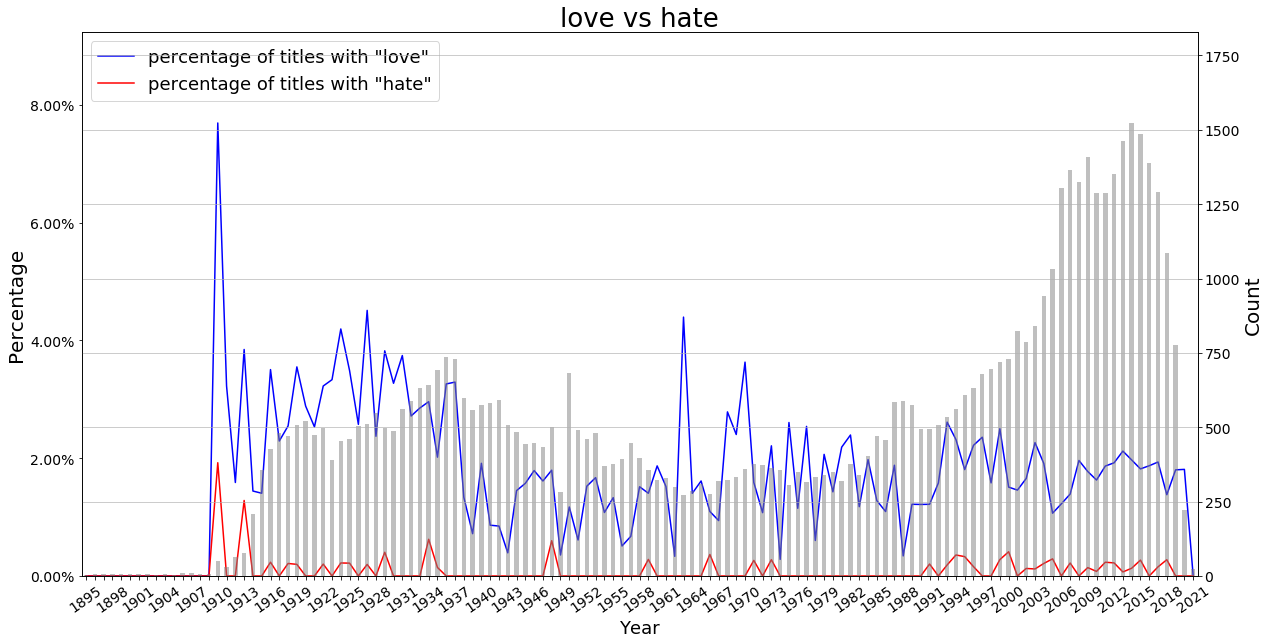

In [34]:
plot_term_pct_comparison(df, term_1='love', term_2='hate')

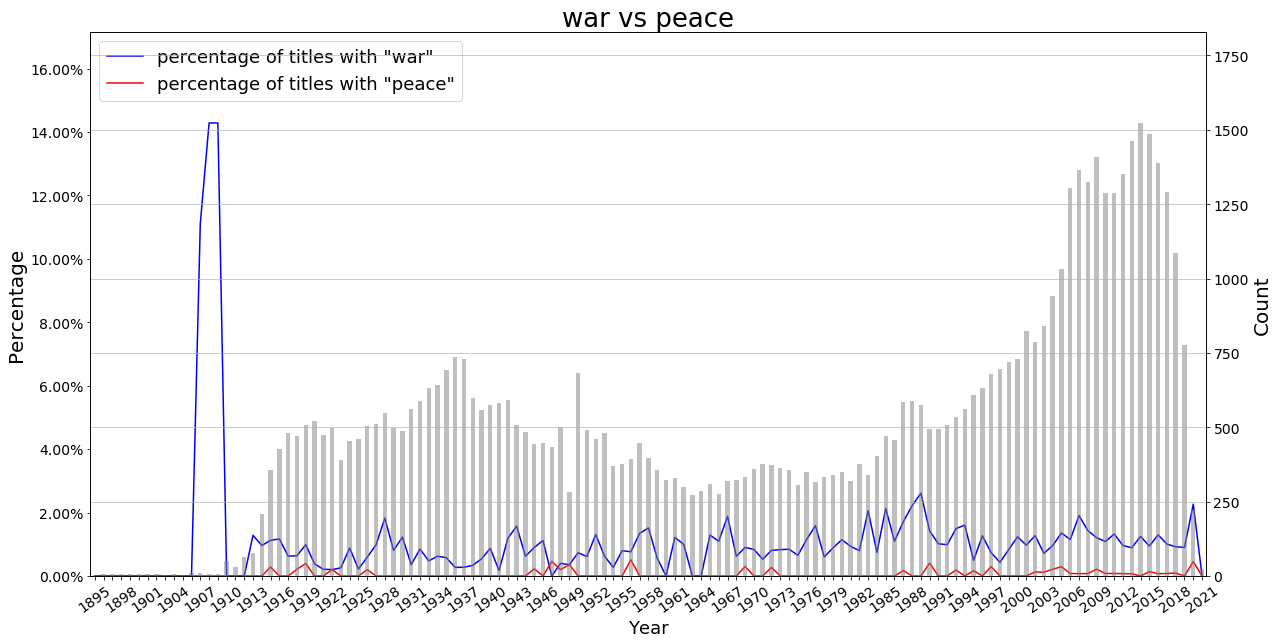

In [31]:
plot_term_pct_comparison(df, term_1='war', term_2='peace')

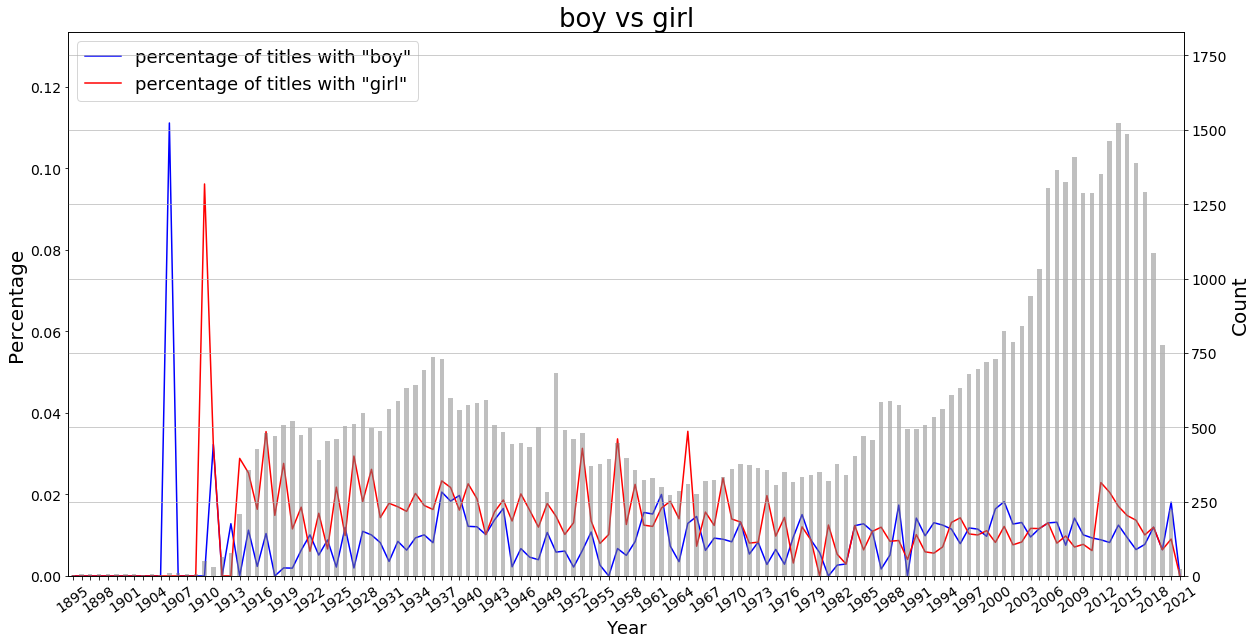

In [32]:
plot_term_pct_comparison(df, term_1='boy', term_2='girl')

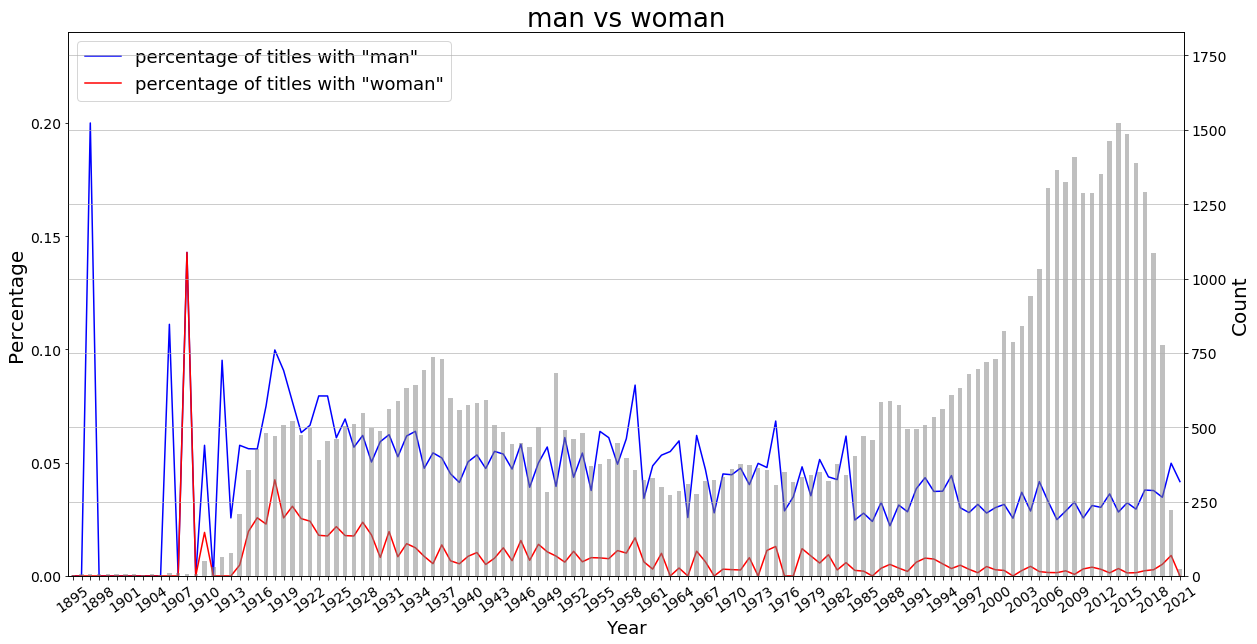

In [33]:
# this is tricky, because every film that contains "woman" also contains "man"
plot_term_pct_comparison(df, term_1='man', term_2='woman')

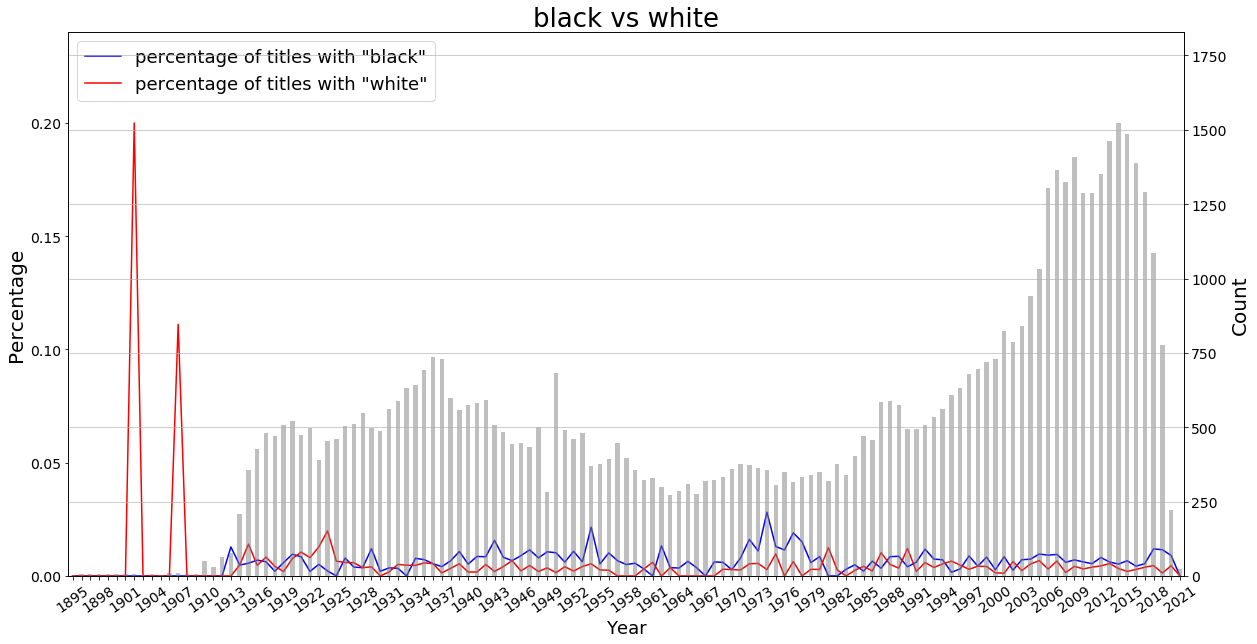

In [34]:
# might need to remove the outliers to have a better scale
plot_term_pct_comparison(df, term_1='black', term_2='white')

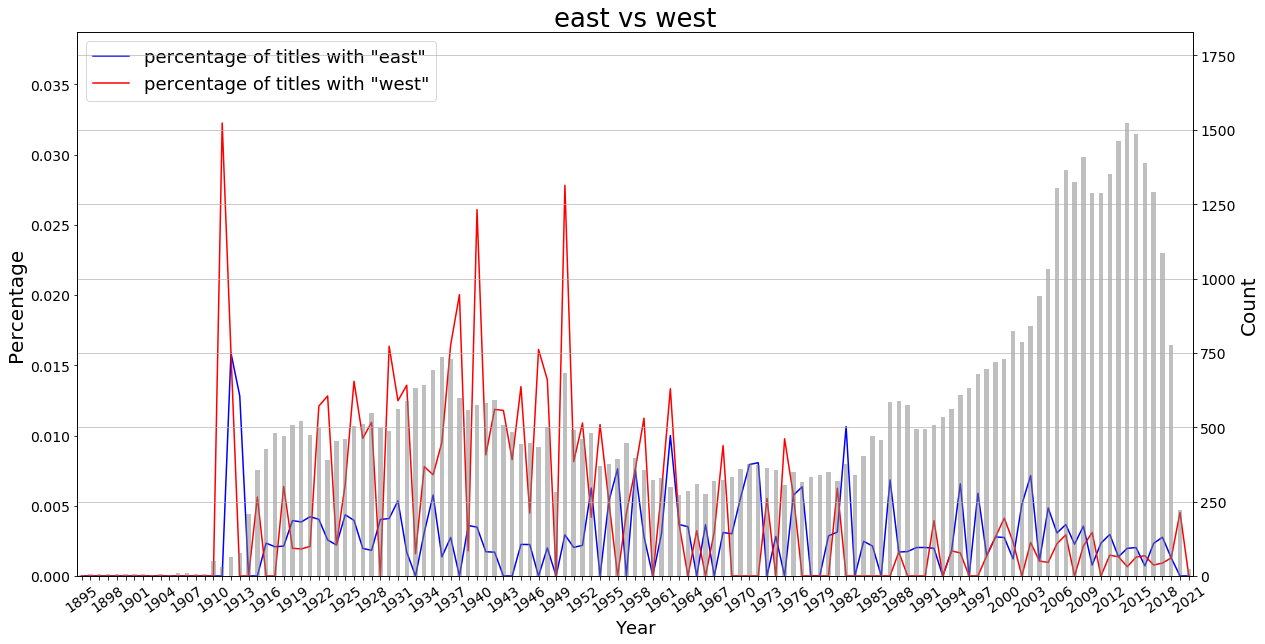

In [35]:
plot_term_pct_comparison(df, term_1='east', term_2='west')

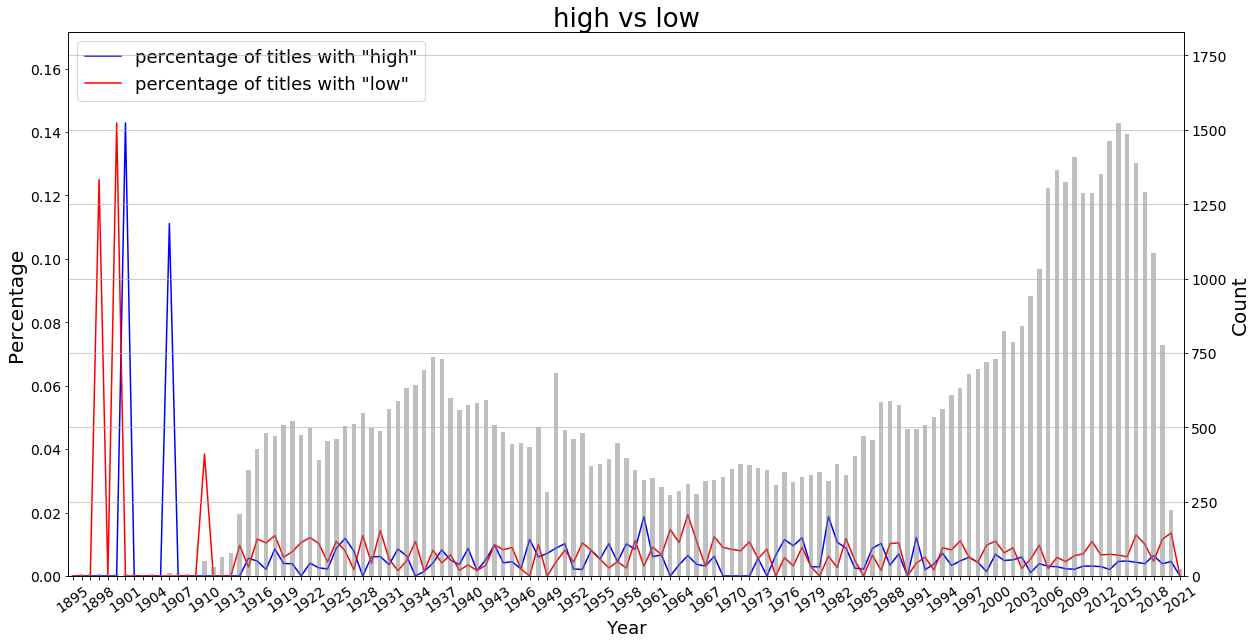

In [36]:
plot_term_pct_comparison(df, term_1='high', term_2='low')

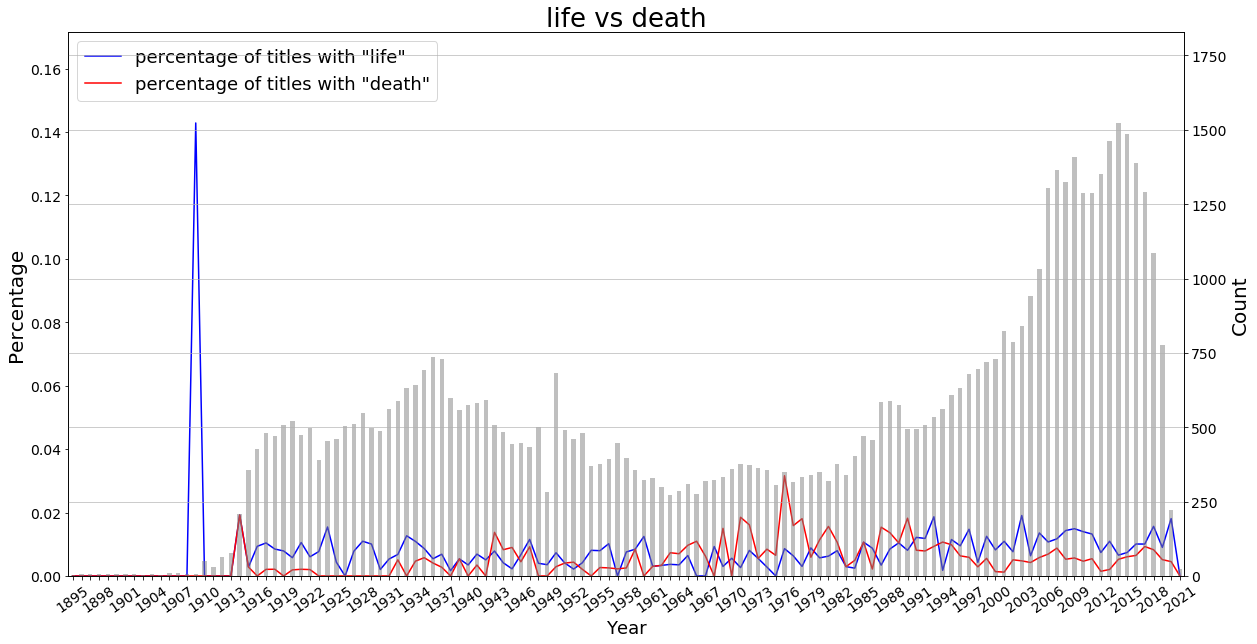

In [37]:
plot_term_pct_comparison(df, term_1='life', term_2='death')

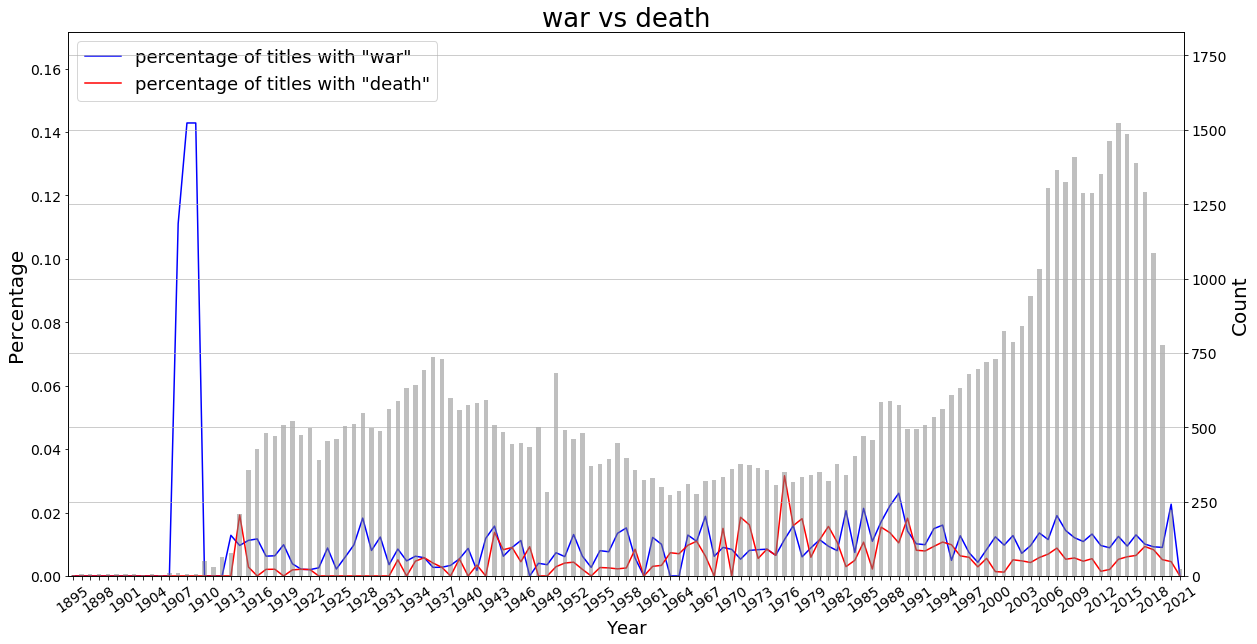

In [38]:
plot_term_pct_comparison(df, term_1='war', term_2='death')